# Problem statment explanation:-

**A finance company specializes in providing various types of loans, and the current focus is on the home loan application process. The primary objective is to optimize the loan approval process by leveraging machine learning to accurately predict the eligibility of customers for home loans. This not only streamlines the application process but also ensures that the finance company makes informed decisions while minimizing the risk associated with loan approval.**

Attributes present in our data:-
*****************************************


1)loan_id: This is a unique identifier for each loan in the dataset. It's a reference number or code assigned to distinguish one loan from another.
*****************************************

2)no_of_dependents: Represents the number of dependents (family members, children, etc.) that the loan applicant has. This information can be relevant in assessing the financial responsibilities of the applicant.
*****************************************


3)Education:Indicates the educational level of the loan applicant. This could include categories such as 'Graduate' or 'Not Graduate'. Education level may impact earning potential and, consequently, loan eligibility.
*****************************************


4)self_employed: A binary indicator (yes/no) representing whether the loan applicant is self-employed or not. Self-employment status can influence the stability of income and, therefore, impact loan approval.
*****************************************


5)Income_annum: This column likely represents the annual income of the loan applicant. It is a crucial factor in determining the borrower's capacity to repay the loan.
*****************************************


6)loan_amount: The amount of money requested by the applicant as a loan. This is the principal amount that the borrower is seeking.
*****************************************


7)loan_term:Represents the duration of the loan in terms of months or years. It defines the period over which the borrower will repay the loan.
*****************************************


8)cibil_score: CIBIL (Credit Information Bureau India Limited) score is a credit score that reflects an individual's creditworthiness. A higher score is generally associated with lower credit risk.
*****************************************


9)residential_assets_value:The value of the residential assets owned by the loan applicant. This could include the value of a house or other residential properties.
*****************************************


10)commercial_assets_value:Represents the value of any commercial assets owned by the loan applicant. This might include business properties or assets.
*****************************************


11)luxury_assets_value:Indicates the value of luxury assets owned by the applicant, such as high-end cars, jewelry, etc.
*****************************************


12)bank_asset_value:Represents the value of assets held in bank accounts by the loan applicant. This could include savings, fixed deposits, etc.
*****************************************


13)loan_status:This column likely indicates the status of the loan application or the outcome of the loan approval process. Common values may include 'Approved' or 'Rejected', indicating whether the loan was granted or not.
*****************************************


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
#chi-square test of independence
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import graphviz


import warnings
warnings.filterwarnings('ignore')

## conda install -c anaconda statsmodels
import statsmodels.api as sm

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

In [4]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive\loan_approval_dataset.csv")

# Print a small part of the DataFrame
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
#To understand no of columns in the dataset
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
for i in df.columns:
  print(i,"-",df[i].nunique())

loan_id - 4269
 no_of_dependents - 6
 education - 2
 self_employed - 2
 income_annum - 98
 loan_amount - 378
 loan_term - 10
 cibil_score - 601
 residential_assets_value - 278
 commercial_assets_value - 188
 luxury_assets_value - 379
 bank_asset_value - 146
 loan_status - 2


#columns other than loan_id are having a problem of extra spacing lets sort it out

In [7]:
# Assuming df is your DataFrame
df.columns = df.columns.str.strip()
# Assuming df is your DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Print the cleaned column names
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


#We must have to delve into the dataset before finding out reasons for accepting the loan , lets try to see why banks are rejecting the loan for few people

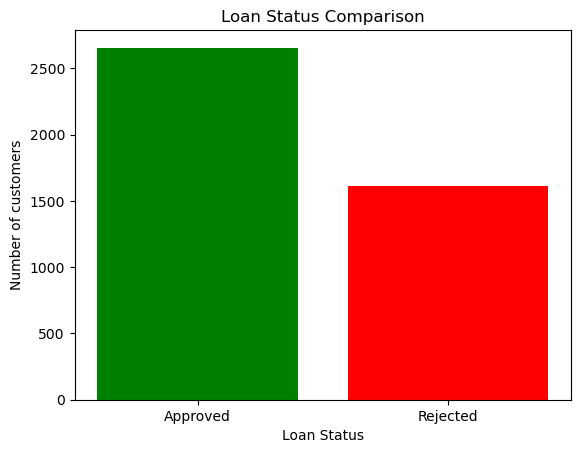

In [8]:
# Count the occurrences of 'Accepted' and 'Rejected'
status_counts = df['loan_status'].value_counts()

# Create a bar chart
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Number of customers')
plt.title('Loan Status Comparison')

# Display the plot
plt.show()


In [9]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
df["cibil_score"].describe()

count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64

In [11]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


if we observe residential_assets_value we can observe that there are few negative values which is not correct..There might be a misentry in that so we should correct it by making these values postive

In [12]:
# Assuming df is your DataFrame and 'column_name' is the column you want to make positive
df['residential_assets_value'] = df['residential_assets_value'].abs()

In [13]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [14]:
#understanding datatypes of each column
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [15]:
#checking for unique values in each column such that we could whether there are any incorrect dtypes
for i in df.columns:
  print("no of unique values and dtype:","|",i,"|",df[i].nunique(),"|",df[i].dtype)

no of unique values and dtype: | loan_id | 4269 | int64
no of unique values and dtype: | no_of_dependents | 6 | int64
no of unique values and dtype: | education | 2 | object
no of unique values and dtype: | self_employed | 2 | object
no of unique values and dtype: | income_annum | 98 | int64
no of unique values and dtype: | loan_amount | 378 | int64
no of unique values and dtype: | loan_term | 10 | int64
no of unique values and dtype: | cibil_score | 601 | int64
no of unique values and dtype: | residential_assets_value | 277 | int64
no of unique values and dtype: | commercial_assets_value | 188 | int64
no of unique values and dtype: | luxury_assets_value | 379 | int64
no of unique values and dtype: | bank_asset_value | 146 | int64
no of unique values and dtype: | loan_status | 2 | object


In [16]:
#sepreating numerical and categorical columns
numericalcolumns=[]
categoricalcolumns=[]

for i in df.columns:
  if df[i].dtypes=="object":
    categoricalcolumns.append(i)

  else:
    numericalcolumns.append(i)
print(numericalcolumns)
print(categoricalcolumns)

['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
['education', 'self_employed', 'loan_status']


In [17]:
print(numericalcolumns)
print(categoricalcolumns)

['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
['education', 'self_employed', 'loan_status']


3.Data Quality Check And Missing Values

3.1 Percentage of missing values for columns

In [18]:
# checking column-wise null percentages
cols = pd.DataFrame(df.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                          precentage_missing_value
loan_id                                        0.0
no_of_dependents                               0.0
education                                      0.0
self_employed                                  0.0
income_annum                                   0.0
loan_amount                                    0.0
loan_term                                      0.0
cibil_score                                    0.0
residential_assets_value                       0.0
commercial_assets_value                        0.0
luxury_assets_value                            0.0
bank_asset_value                               0.0
loan_status                                    0.0


Though there are no missing values in columns such as bank_asset_value,luxury_assets_value,commercial_assets_value,residential_assets_value but there cannot be 0s in rows of those columns so we will have to replace them either with mean,median by checking distributions(dist plot) or bin this columns with few labels

<Axes: xlabel='residential_assets_value', ylabel='Density'>

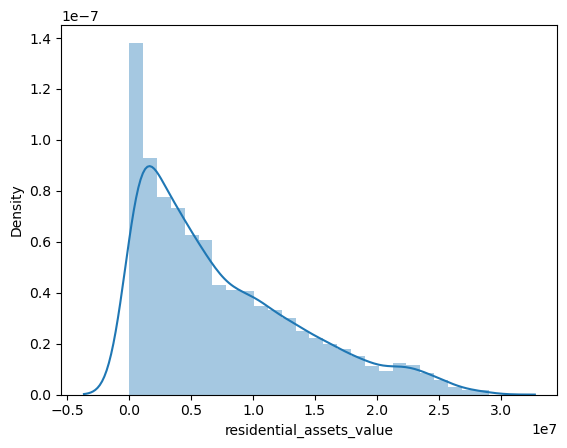

In [19]:
#replacing the 0's with either mean or median by checking their distributions
sns.distplot(df["residential_assets_value"])
#if we see the distribution it is not normally distributed ,it is right skewed distribution.we will replace here with median as it is not affected by outliers.

<Axes: xlabel='commercial_assets_value', ylabel='Density'>

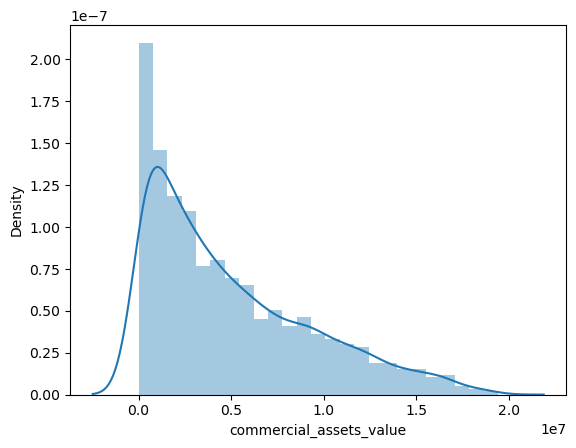

In [20]:
#replacing the 0's with either mean or median by checking their distributions
sns.distplot(df["commercial_assets_value"])
#if we see the distribution it is not normally distributed ,it is right skewed distribution.we will replace here with median as it is not affected by outliers.

<Axes: xlabel='bank_asset_value', ylabel='Density'>

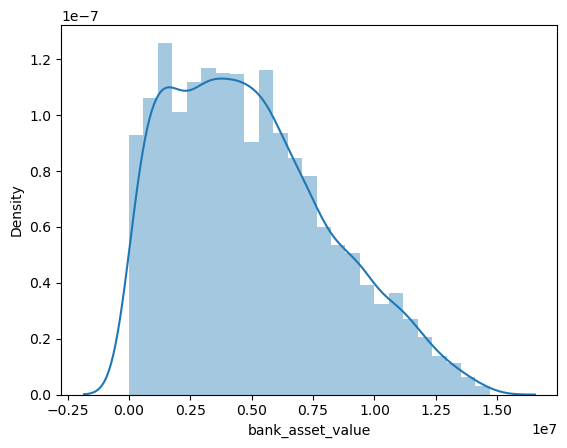

In [21]:
#replacing the 0's with either mean or median by checking their distributions
sns.distplot(df["bank_asset_value"])
#if we see the distribution it is not normally distributed ,it is right skewed distribution.we will replace here with median as it is not affected by outliers.

<Axes: xlabel='luxury_assets_value', ylabel='Density'>

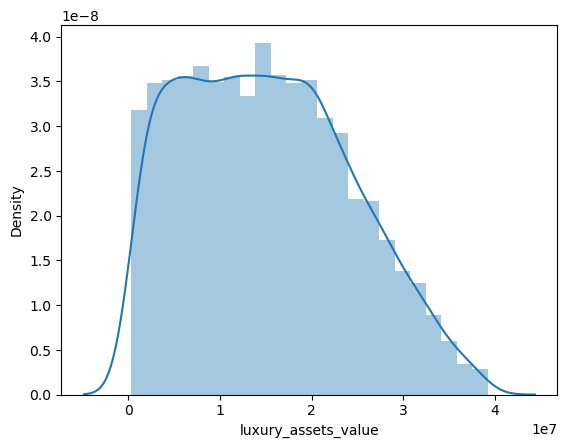

In [22]:
#replacing the 0's with either mean or median by checking their distributions
sns.distplot(df["luxury_assets_value"])
#if we see the distribution it is not normally distributed ,it is right skewed distribution.we will replace here with median as it is not affected by outliers.

In [23]:
#1)for column "luxury_assets_value"
# replace zeros with NaN
df["luxury_assets_value"].replace(0, pd.np.nan, inplace=True)
# replace NaN values with the median of the column
median =df["luxury_assets_value"].median()
df["luxury_assets_value"].fillna(median, inplace=True)
#2)for column commercial_assets_value
# replace zeros with NaN
df["commercial_assets_value"].replace(0, pd.np.nan, inplace=True)
# replace NaN values with the median of the column
median =df["commercial_assets_value"].median()
df["commercial_assets_value"].fillna(median, inplace=True)
#3)for column residential_assets_value
# replace zeros with NaN
df["residential_assets_value"].replace(0, pd.np.nan, inplace=True)
# replace NaN values with the median of the column
median =df["residential_assets_value"].median()
df["residential_assets_value"].fillna(median, inplace=True)
#4)for column bank_asset_value
# replace zeros with NaN
df["bank_asset_value"].replace(0, pd.np.nan, inplace=True)
# replace NaN values with the median of the column
median =df["bank_asset_value"].median()
df["bank_asset_value"].fillna(median, inplace=True)

AttributeError: module 'pandas' has no attribute 'np'

In [24]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


#Mean is around 600 so we can consider this a metric on which loan status apprval might be considered

In [25]:
#Lets seprate two dataframes based on loan status approval
Accepted_people= df[df["loan_status"] == "Approved"]    
Rejected_people= df[df["loan_status"] == "Rejected"]


##We have to find the actual reason for people getting rejected for loan..?Is it there credit score affecting or Are there assets affecting..

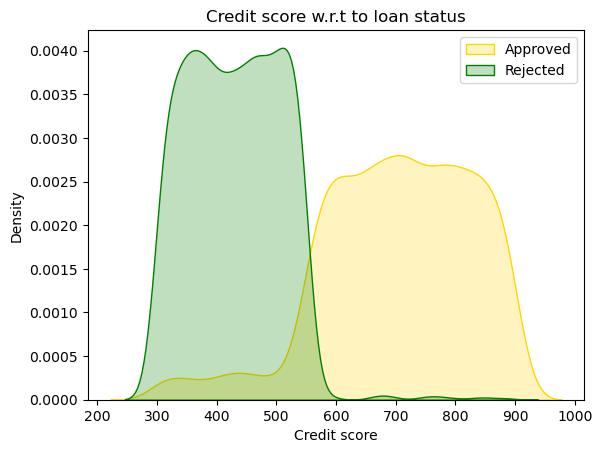

In [26]:
#
ax = sns.kdeplot(df.cibil_score[(df["loan_status"] == "Approved") ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.cibil_score[(df["loan_status"] == "Rejected") ],
                ax =ax, color="Green", shade= True);

ax.legend(["Approved","Rejected"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Credit score');
ax.set_title('Credit score w.r.t to loan status');

Note:- If we observe here For loan status rejected there are very few people above 600 while majority of the people are below 600, so we can understand if credit score is below 600 there are high chances of rejection similary there are highest chances of acceptance greater than 600..

1)We also have to find out why few people whose credit score less than are accepted and people whose credit score even being at higher side got rejected....

Certainly! Here's a concise explanation:

### Possible Reasons for Loan Acceptance with Low Credit Score:

1. **Collateral or Assets:** Providing valuable collateral or assets.
2. **Stable Income:** Demonstrating a stable and sufficient income.
3. **Co-Signers or Guarantors:** Having a co-signer with a higher credit score.

### Possible Reasons for Loan Rejection with Higher Credit Score:

1. **Insufficient Income:** Income not sufficient to cover the loan.
2. **Credit Report Details:** Presence of negative items in the credit report.
3. **Unstable Employment:** History of unstable employment.
4. **Loan Amount Requested:** Requesting an unusually high loan amount.
5. **Lender's Criteria:** Specific policies and risk tolerance of the lender.

### Additional Considerations:

- **Loan Purpose:** Purpose of the loan may influence approval.
- **Credit Scoring Model:** Different models may weigh factors differently.
- **Application Details:** Accuracy and completeness of application information.

#Lets filter these kind of records and try to understand

In [27]:
#Lets seprate a dataframe based on loan status and credit score
rejected_high_cibil = df[(df["loan_status"] == "Rejected") & (df["cibil_score"] > 600)]
rejected_high_cibil.shape

(11, 13)

Total of 11 people are present with such type of record

In [28]:
# Set the display option to show numbers in full
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Use describe for the DataFrame
rejected_high_cibil.head(11)



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
67,68,0,Not Graduate,Yes,2700000,10100000,20,693,200000,1700000,5900000,1400000,Rejected
236,237,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
348,349,0,Not Graduate,No,2000000,7000000,6,666,0,1200000,4300000,1400000,Rejected
559,560,2,Graduate,Yes,200000,500000,6,885,100000,0,300000,200000,Rejected
911,912,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
1446,1447,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected
2856,2857,3,Not Graduate,Yes,8300000,31400000,6,674,1000000,1600000,17200000,6100000,Rejected
3180,3181,4,Graduate,No,3200000,12200000,14,683,100000,1100000,7500000,2900000,Rejected
3213,3214,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
3527,3528,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected


What could be the reason even with such good credit score they had been rejected....??it might be because of few other factors..

In [29]:
#Lets seprate a dataframe based on loan status and credit score
accepted_low_cibil = df[(df["loan_status"] == "Approved") & (d  f["cibil_score"] < 600)]
accepted_low_cibil.shape

SyntaxError: invalid syntax. Perhaps you forgot a comma? (611576501.py, line 2)

In [30]:
accepted_low_cibil.describe()

NameError: name 'accepted_low_cibil' is not defined

Why these people are accepted with even lower credit score??

**Note**:- Here feature extraction could become a crucial part and even new features can be formed using exisitng features..We can then build a good model and then gather more insights from the problem statment..

**1)Debt-to-Income Ratio:**

Create a new feature representing the debt-to-income ratio. This can be calculated as the ratio of the loan amount to the annual income. It gives an indication of the individual's ability to manage their debt in relation to their income.

**2)Loan Amount per Dependents: **
Explore the relationship between the loan amount and the number of dependents. This feature can indicate how the loan amount is distributed relative to the number of dependents.

**3)Asset-to-Loan Ratio:**
Calculate the ratio of total assets to the loan amount. This may provide insights into the individual's financial stability.

**4)Cibil Score Binned:**
Bin the Cibil scores into categories to capture different risk levels.

**5)Average Monthly Repayment**
Calculate the average monthly repayment by dividing the loan amount by the loan term. This feature reflects the average monthly financial commitment, providing insights into the affordability of the loan.




In [31]:
df['debt_to_income_ratio'] = df['loan_amount'] / df['income_annum']
df['loan_per_dependent'] = df['loan_amount'] / np.where(df['no_of_dependents'] == 0, 1, df['no_of_dependents'])
df['asset_to_loan_ratio'] = (df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']) / df['loan_amount']
df['cibil_score_bin'] = pd.cut(df['cibil_score'], bins=[0, 500, 650, 700, 750, float('inf')], labels=['Poor', 'Below Average', 'Fair', 'Good', 'Excellent'])
df['avg_monthly_repayment'] = df['loan_amount'] / df['loan_term']


In [32]:
df.head(14)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,debt_to_income_ratio,loan_per_dependent,asset_to_loan_ratio,cibil_score_bin,avg_monthly_repayment
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,3.11,14950000.00,1.70,Excellent,2491666.67
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,2.98,12200000.00,1.39,Poor,1525000.00
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,3.26,9900000.00,1.94,Below Average,1485000.00
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,3.74,10233333.33,1.72,Poor,3837500.00
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,2.47,4840000.00,2.27,Poor,1210000.00
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,2.81,13500000.00,2.51,Poor,1350000.00
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,3.79,6600000.00,2.15,Fair,8250000.00
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,2.63,7500000.00,2.45,Poor,750000.00
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,2.75,2200000.00,2.50,Excellent,110000.00
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,3.91,860000.00,2.21,Poor,430000.00


Lets do Univariate,bivariate,Multivariate analysis to understand our data more and do few changes to build a robust model..

In [33]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'debt_to_income_ratio', 'loan_per_dependent', 'asset_to_loan_ratio',
       'cibil_score_bin', 'avg_monthly_repayment'],
      dtype='object')

#Visualizations without target variable

1)Analysis of credit scores bin column

In [34]:
#Lets seprate two dataframes based on loan status approval
Accepted_people= df[df["loan_status"] == "Approved"]
Rejected_people= df[df["loan_status"] == "Rejected"]

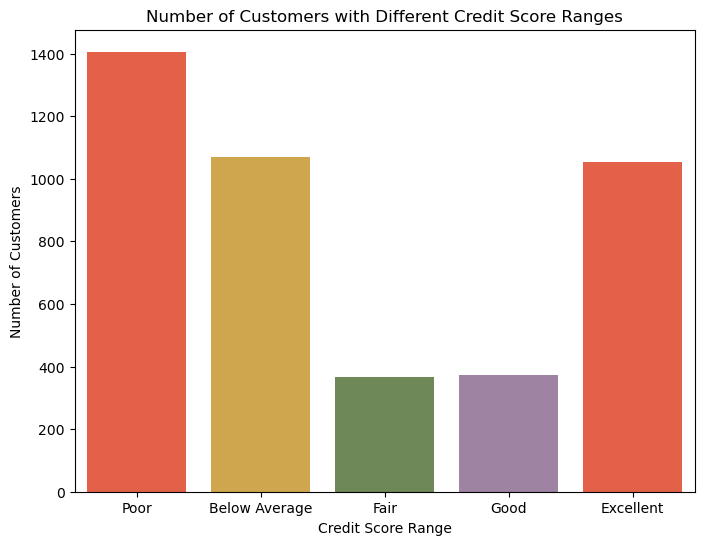

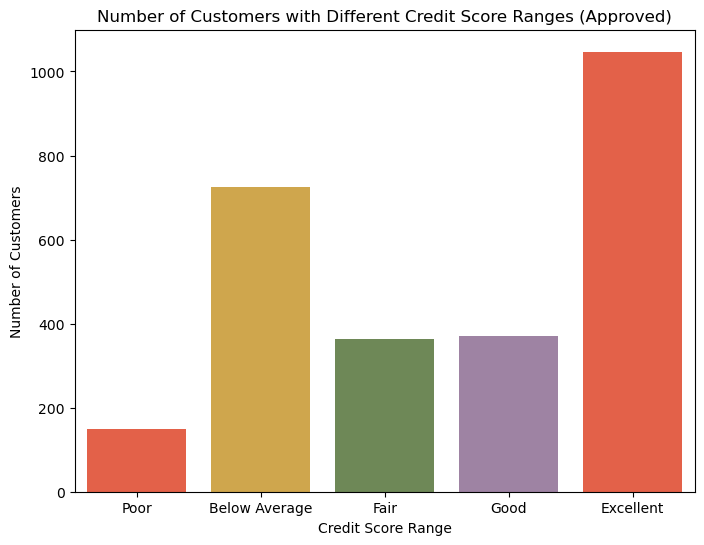

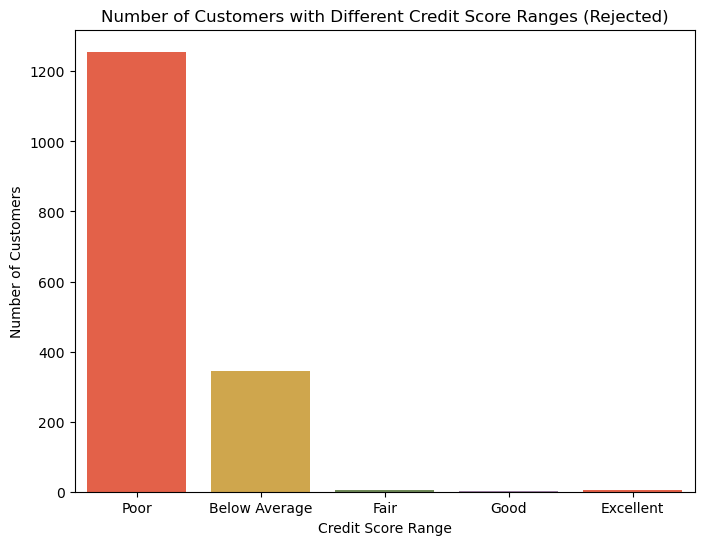

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cibil_score_distribution(data, loan_status=None, title_suffix=""):
    if loan_status:
        filtered_data = data[data["loan_status"] == loan_status]
        title = f'Number of Customers with Different Credit Score Ranges ({loan_status}){title_suffix}'
    else:
        filtered_data = data
        title = f'Number of Customers with Different Credit Score Ranges{title_suffix}'

    # Create bar plot using Seaborn
    plt.figure(figsize=(8, 6))
    sns.countplot(data=filtered_data, x='cibil_score_bin', palette=['#fc4f30', '#e5ae37', '#6d904f', '#a27ea8'])

    # Set chart title and axis labels
    plt.title(title)
    plt.xlabel('Credit Score Range')
    plt.ylabel('Number of Customers')
    plt.show()

# Plot overall distribution
plot_cibil_score_distribution(df)

# Plot distribution for Approved loans
plot_cibil_score_distribution(df, loan_status="Approved")

# Plot distribution for Rejected loans
plot_cibil_score_distribution(df, loan_status="Rejected")


**There are so many people with poor and below average credit scores**

**Majority people belongs to loan status rejected**

In [36]:
# group the data by cibil_score_bin and self_employed, and count the number of customers for each city
counts = df.groupby(['cibil_score_bin','self_employed']).size().reset_index(name="Number of Customers")
counts

,cibil_score_bin,self_employed,Number of Customers
0,Poor,No,691
1,Poor,Yes,715
2,Below Average,No,527
3,Below Average,Yes,544
4,Fair,No,195
5,Fair,Yes,172
6,Good,No,177
7,Good,Yes,195
8,Excellent,No,529
9,Excellent,Yes,524


The provided table shows the count of customers for different combinations of 'cibil_score_bin' and 'self_employed'. Let's analyze some insights from the data:

Overall Distribution:

The 'Poor' and 'Below Average' credit score ranges have a higher number of self-employed individuals compared to other credit score ranges.
Self-Employment Impact:

Across all credit score ranges, there are more self-employed individuals ('Yes') than those who are not self-employed ('No').
This trend is consistent across all credit score bins, indicating that self-employment might be a common characteristic among individuals applying for loans.
Impact of Credit Score on Self-Employed Customers:

Within the 'Poor' credit score bin, there are slightly more self-employed individuals compared to those who are not self-employed.
The distribution is relatively balanced for 'Below Average' and 'Fair' credit score bins.
In the 'Good' and 'Excellent' credit score bins, there are more self-employed individuals compared to those who are not self-employed.
Loan Risk Assessment:

The distribution of self-employed and non-self-employed individuals across different credit score bins provides insights into how creditworthiness might vary among these groups.
Lenders might need to assess the risk associated with self-employed individuals, especially in the 'Poor' credit score range.
Further Analysis:

Further analysis could involve comparing the loan approval rates for self-employed and non-self-employed individuals within each credit score bin to understand if there's a correlation between self-employment, credit score, and loan approval status.
These insights can guide a more in-depth analysis and decision-making process for loan approvals, risk assessment, and understanding the characteristics of the customer base.

Checking correlation between newly engineered features

In [37]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'debt_to_income_ratio', 'loan_per_dependent', 'asset_to_loan_ratio',
       'cibil_score_bin', 'avg_monthly_repayment'],
      dtype='object')

<Axes: >

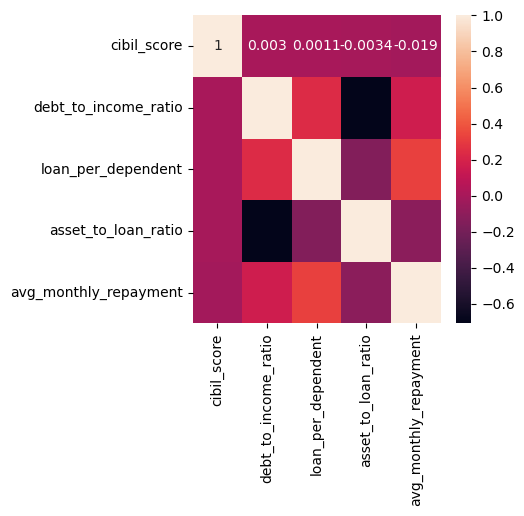

In [38]:
plt.figure(figsize=(4,4))
sns.heatmap(df[['cibil_score','debt_to_income_ratio',
  'loan_per_dependent',
 'asset_to_loan_ratio',
 'avg_monthly_repayment']].corr(),annot=True)

In this correlation table:

CIBIL Score and Other Variables:
CIBIL Score has near-zero correlations with debt_to_income_ratio, loan_per_dependent, asset_to_loan_ratio, and a small negative correlation with avg_monthly_repayment.
Debt-to-Income Ratio and Other Variables:
Debt-to-Income Ratio has a moderate positive correlation with loan_per_dependent and a strong negative correlation with asset_to_loan_ratio. It has low correlations with CIBIL Score and avg_monthly_repayment.
Loan per Dependent and Other Variables:
Loan per Dependent has a moderate positive correlation with avg_monthly_repayment and low correlations with CIBIL Score, debt_to_income_ratio, and asset_to_loan_ratio.
Asset to Loan Ratio and Other Variables:
Asset to Loan Ratio has a strong negative correlation with debt_to_income_ratio and a moderate negative correlation with avg_monthly_repayment. It has low correlations with CIBIL Score, loan_per_dependent.
Avg Monthly Repayment and Other Variables:
Avg Monthly Repayment has a moderate positive correlation with loan_per_dependent and low correlations with CIBIL Score, debt_to_income_ratio, asset_to_loan_ratio.
These insights provide an overview of the relationships between the specified variables, where correlation values closer to 1 or -1 indicate stronger relationships. Interpretation of correlations requires considering the context and domain knowledge for a comprehensive understanding.

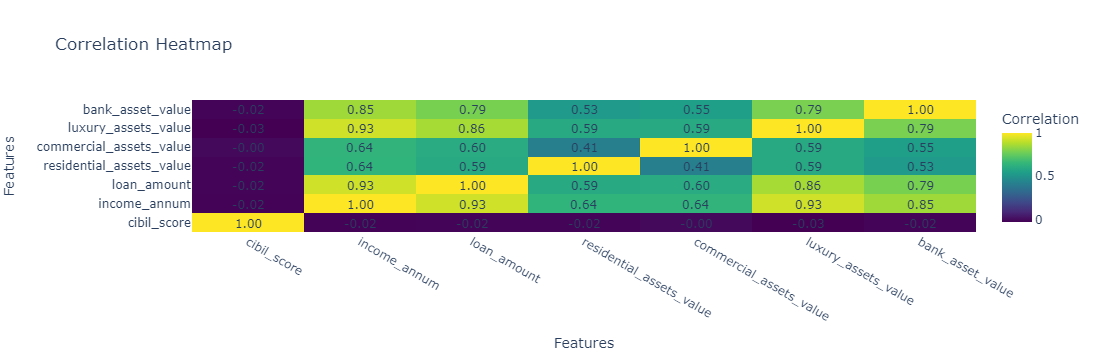

In [45]:
import plotly.graph_objects as go

# Assuming df is your DataFrame
correlation_matrix = df[['cibil_score', 'income_annum', 'loan_amount',
                        'residential_assets_value', 'commercial_assets_value',
                        'luxury_assets_value', 'bank_asset_value']].corr()

fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlation')))

# Add annotations
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                x=correlation_matrix.columns[j],
                y=correlation_matrix.index[i],
                text="{:.2f}".format(value),
                showarrow=False
            )
        )

fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    annotations=annotations
)

fig.show()


In [83]:
# Creating Dataframe of the loan_status  with Approved customers
Approved= df.query('loan_status=="Approved"')
# Creating Dataframe of the loan_status  with Rejected customers
Rejected= df.query('loan_status=="Rejected"')

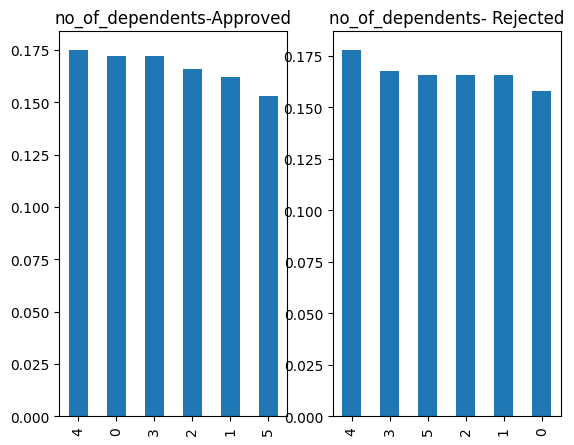

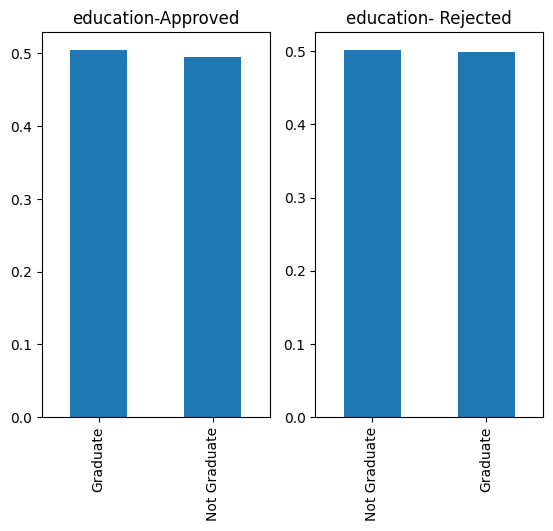

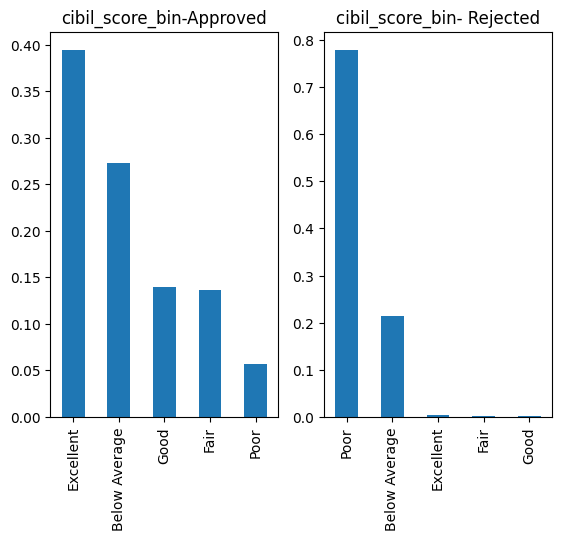

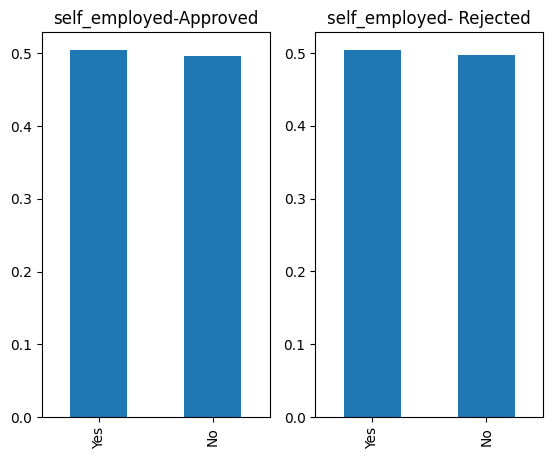

In [86]:
catcolanalysis=['no_of_dependents','education','cibil_score_bin','self_employed']
#loop for performing univariate analysis
for i in catcolanalysis:
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    Approved[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '-Approved')
    plt.subplot(1,3,2)
    Rejected[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Rejected')


**Model building**

In [94]:
# Assuming df is your DataFrame
df['education'] = df['education'].astype('category')
df['self_employed'] = df['self_employed'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')
df['no_of_dependents'] = df['no_of_dependents'].astype('category')

In [106]:
# split into input (X) and output (y) variables
X=df.drop(['loan_id','loan_status'], axis=1)
y=df["loan_status"]

In [107]:
#label encoding of target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [108]:
cat_cols=df.select_dtypes(include=['category'])
cat_cols=cat_cols.drop(["loan_status"],axis=1)
cat_cols=cat_cols.columns

In [109]:
num_cols=df.select_dtypes(include=['int64', 'float64'])
num_cols=num_cols.columns
num_cols=num_cols.drop(["loan_id",'debt_to_income_ratio','asset_to_loan_ratio'])

In [110]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'debt_to_income_ratio', 'loan_per_dependent', 'asset_to_loan_ratio',
       'cibil_score_bin', 'avg_monthly_repayment'],
      dtype='object')

In [111]:
 ## Convert Categorical Columns to Dummies
X = pd.get_dummies(X, columns=cat_cols,drop_first=True)
#scaling
scaler = StandardScaler()
# scale on train
X[num_cols] =scaler.fit_transform(X[num_cols])

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,test_size=0.25,random_state=107,shuffle=True)
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))

X_Train Size: (3201, 23)
X _test Size: (1068, 23)
Y_train Size: (3201,)
Y_test Size: (1068,)


#Defining error metrics

In [114]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

#defining error metrics
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="macro")
    train_precision= precision_score(train_actual,train_predicted,average="macro")
    train_f1score  = f1_score(train_actual,train_predicted,average="macro")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="macro")
    test_precision= precision_score(test_actual,test_predicted,average="macro")
    test_f1score  = f1_score(test_actual,test_predicted,average="macro")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

#Model building

We will experiment different models until we find out a generalized model out of all.

1)naivebayes classifier

2)decision tree classifier

3)random forest classifier

4)support vector machines classifier

5)logistic regression-(one vs all approach)

6)boosting techniques

7)neuralnetworks



we will choose the best model from all and then try to draw learning patterns for all this models.


In [118]:
###**1)Naive bayes classifier**
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn import svm
NB1 =  GaussianNB()
NB1=NB1.fit(X_train, y_train)
y_pred_train =NB1.predict(X_train)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = NB1.predict(X_test)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))
print("recall-train",recall_score(y_train,y_pred_train,average='macro'))
print("recall-test",recall_score(y_test,y_pred_test,average='macro'))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GaussianNB",scores)
scores

trainaccuracy 0.8360943775100401
testaccuracy 0.8174157303370787
recall-train 0.8360943775100402
recall-test 0.8512242037456758

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9848    0.6827    0.8064      1992
           1     0.7572    0.9895    0.8579      1992

    accuracy                         0.8361      3984
   macro avg     0.8710    0.8361    0.8321      3984
weighted avg     0.8710    0.8361    0.8321      3984


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9916    0.7123    0.8291       664
           1     0.6768    0.9901    0.8040       404

    accuracy                      

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.84,0.84,0.87,0.83,0.82,0.85,0.83,0.82


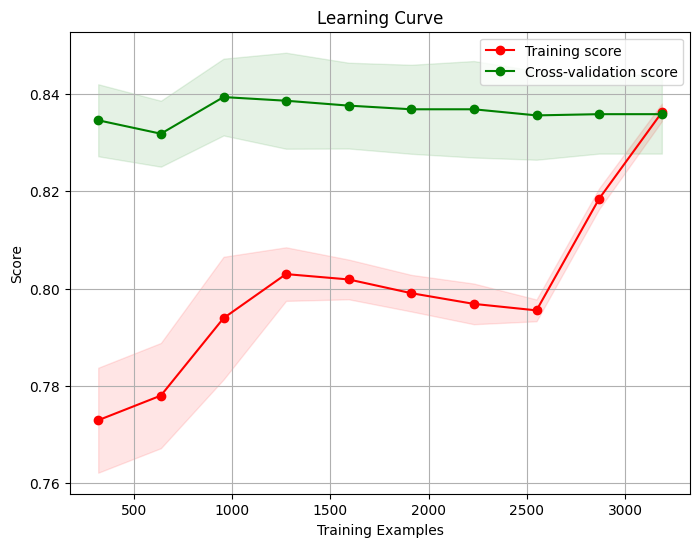

In [119]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(NB1, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [120]:
###2)**Decision tree classifier**
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X=X_train, y= y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Decisiontree",scores)
scores


Train Accuracy: 1.0
Test Accuracy: 0.9943820224719101

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1992
           1     1.0000    1.0000    1.0000      1992

    accuracy                         1.0000      3984
   macro avg     1.0000    1.0000    1.0000      3984
weighted avg     1.0000    1.0000    1.0000      3984


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9970    0.9940    0.9955       664
           1     0.9901    0.9950    0.9926       404

    accuracy                         0.9944      1068
   macro avg     0.9936    0.9945    0.9940      1068


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.84,0.84,0.87,0.83,0.82,0.85,0.83,0.82
1,Decisiontree,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99


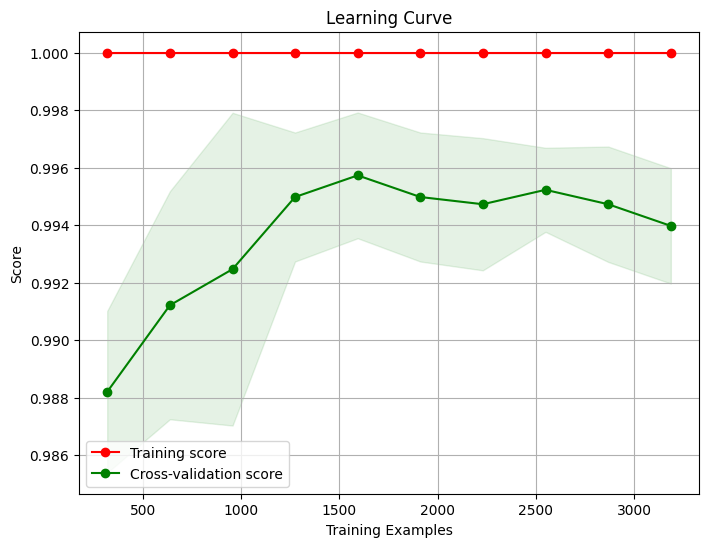

In [121]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_dt, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

**As per observation from our learning curve we could see that model is overfitting.Best models should always generalize well when faced with instances that were not part of the initial training data.There is a large gap between training and validation data.To adress this issue we can either add more data or do hyperparamter tuning for better results.**

3)Random forest

Train Accuracy: 1.0
Test Accuracy: 0.9962546816479401

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1992
           1     1.0000    1.0000    1.0000      1992

    accuracy                         1.0000      3984
   macro avg     1.0000    1.0000    1.0000      3984
weighted avg     1.0000    1.0000    1.0000      3984


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9955    0.9985    0.9970       664
           1     0.9975    0.9926    0.9950       404

    accuracy                         0.9963      1068
   macro avg     0.9965    0.9955    0.9960      1068


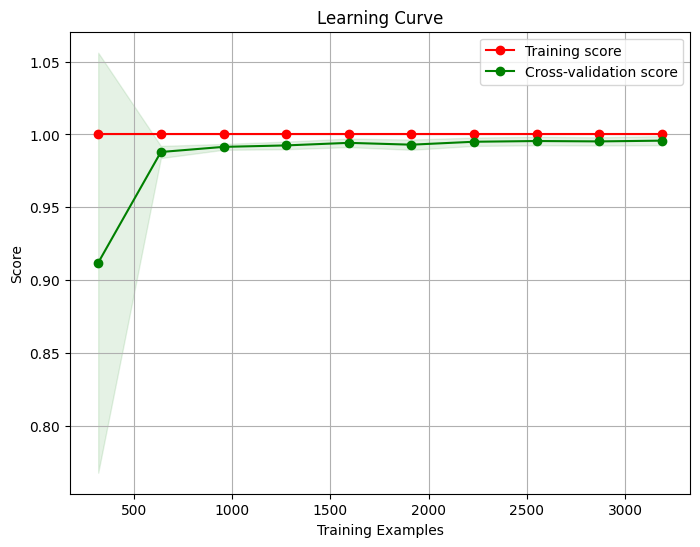

In [122]:
# Import Randomforest Library

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X=X_train, y= y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"randomforest",scores)
scores

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [123]:
importances = clf_rf.feature_importances_
importances
np.argsort(importances)[::-1]
indices = np.argsort(importances)[::-1]
ind_attr_names = X_train.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,cibil_score,cibil_score_bin_Excellent,loan_term,cibil_score_bin_Good,cibil_score_bin_Fair,debt_to_income_ratio,avg_monthly_repayment,cibil_score_bin_Below Average,asset_to_loan_ratio,loan_amount,loan_per_dependent,luxury_assets_value,residential_assets_value,income_annum,bank_asset_value,commercial_assets_value,education_Not Graduate,self_employed_Yes,no_of_dependents_5,no_of_dependents_1,no_of_dependents_3,no_of_dependents_4,no_of_dependents_2
1,0.60,0.11,0.04,0.04,0.04,0.03,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#4)Svm classifer

In [124]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X=X_train, y= y_train)

y_pred_train = clf_svc.predict(X_train)
y_pred_test = clf_svc.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"SVMCLASSIFIER",scores)
scores

Train Accuracy: 0.9610943775100401
Test Accuracy: 0.9485018726591761

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9684    0.9533    0.9608      1992
           1     0.9540    0.9689    0.9614      1992

    accuracy                         0.9611      3984
   macro avg     0.9612    0.9611    0.9611      3984
weighted avg     0.9612    0.9611    0.9611      3984


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9649    0.9518    0.9583       664
           1     0.9225    0.9431    0.9327       404

    accuracy                         0.9485      1068
   macro avg     0.9437    0.9474    0.

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.84,0.84,0.87,0.83,0.82,0.85,0.83,0.82
1,Decisiontree,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99
2,randomforest,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,SVMCLASSIFIER,0.96,0.96,0.96,0.96,0.95,0.95,0.94,0.95


This comes under a generalized model,we will further analyze by learning curves while doing hyper parameter tuning,but the problem with svm is it takes so much time,we will check for alternative models if we didnt find any then we will use svm classifier

###5)**XGBOOST CLASSIFIER**

In [125]:
# Import XGBClassifier Library

from xgboost import XGBClassifier
clf_XGB = XGBClassifier()
clf_XGB.fit(X=X_train, y= y_train)

y_pred_train = clf_XGB.predict(X_train)
y_pred_test = clf_XGB.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"XGBOOST",scores)
scores


Train Accuracy: 1.0
Test Accuracy: 0.99812734082397

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1992
           1     1.0000    1.0000    1.0000      1992

    accuracy                         1.0000      3984
   macro avg     1.0000    1.0000    1.0000      3984
weighted avg     1.0000    1.0000    1.0000      3984


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9970    1.0000    0.9985       664
           1     1.0000    0.9950    0.9975       404

    accuracy                         0.9981      1068
   macro avg     0.9985    0.9975    0.9980      1068
we

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.84,0.84,0.87,0.83,0.82,0.85,0.83,0.82
1,Decisiontree,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99
2,randomforest,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,SVMCLASSIFIER,0.96,0.96,0.96,0.96,0.95,0.95,0.94,0.95
4,XGBOOST,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


###6)**ANN-CLASSIFIER**

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Get the predicted class probabilities for the train and test data
y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)

# Get the predicted classes by selecting the class with the highest probability
y_pred_train = np.argmax(y_pred_train_prob, axis=1)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)
# Print the accuracy scores for the training and test data
print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

# Print the classification report for the training and test data
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
# Get the metrics for the classifier and add them to the scores dictionary
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"ANN-CLASSIFICATION",scores)

Epoch 1/10
125/125 [==============================] - 2s 6ms/step - loss: 0.5989 - accuracy: 0.7101 - val_loss: 0.2246 - val_accuracy: 0.9204
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2615 - accuracy: 0.8956 - val_loss: 0.1837 - val_accuracy: 0.9260
Epoch 3/10
125/125 [==============================] - 0s 4ms/step - loss: 0.2200 - accuracy: 0.9154 - val_loss: 0.1669 - val_accuracy: 0.9373
Epoch 4/10
125/125 [==============================] - 0s 4ms/step - loss: 0.1929 - accuracy: 0.9270 - val_loss: 0.1538 - val_accuracy: 0.9345
Epoch 5/10
125/125 [==============================] - 0s 4ms/step - loss: 0.1792 - accuracy: 0.9290 - val_loss: 0.1440 - val_accuracy: 0.9429
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1618 - accuracy: 0.9410 - val_loss: 0.1281 - val_accuracy: 0.9476
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9372 - val_loss: 0.1179 - val_accuracy: 0.9522
Epoch 

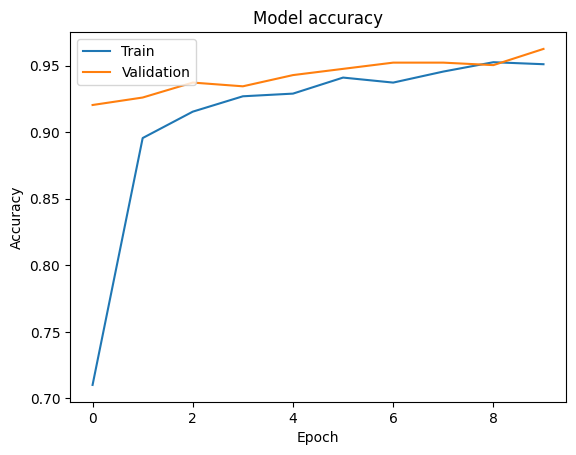

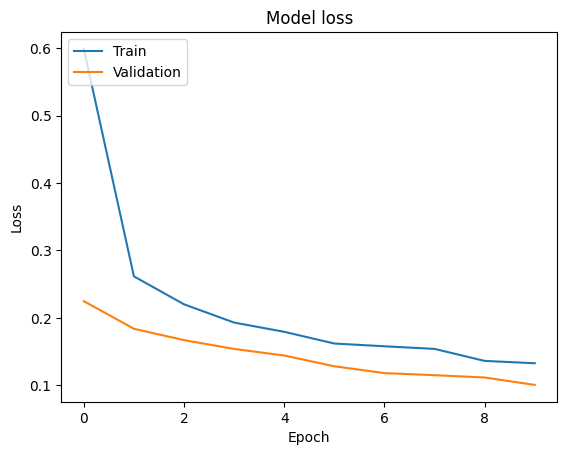

In [127]:
# Plot the training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Both training and test accuracies have increased, and the gap between them has also decreased, which is a good sign. Additionally, looking at the classification report, we can see that the precision, recall, and F1-scores have also improved for all three classes in the test data.**

In [128]:
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.84,0.84,0.87,0.83,0.82,0.85,0.83,0.82
1,Decisiontree,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99
2,randomforest,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,SVMCLASSIFIER,0.96,0.96,0.96,0.96,0.95,0.95,0.94,0.95
4,XGBOOST,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
5,ANN-CLASSIFICATION,0.97,0.97,0.97,0.97,0.96,0.96,0.96,0.96


#Pattern extraction

In [131]:
clf_dt_grid = DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=5,
                       min_samples_split=3, random_state=123)
clf_dt_grid.fit(X=X_train, y= y_train)

y_pred_train = clf_dt_grid.predict(X_train)
y_pred_test = clf_dt_grid.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

Train Accuracy: 0.9977409638554217
Test Accuracy: 0.99812734082397

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9955    1.0000    0.9977      1992
           1     1.0000    0.9955    0.9977      1992

    accuracy                         0.9977      3984
   macro avg     0.9978    0.9977    0.9977      3984
weighted avg     0.9978    0.9977    0.9977      3984


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9970    1.0000    0.9985       664
           1     1.0000    0.9950    0.9975       404

    accuracy                         0.9981      1068
   macro avg     0.9985    0.9975    0.99

In [132]:
from sklearn.tree import export_text
rules = export_text(clf_dt_grid, feature_names=X_train.columns.tolist())
# Sort rules by importance scores and select the top 20 rules
rule_scores = clf_dt_grid.feature_importances_
rule_list = rules.split('\n')
rule_list.pop() # Remove the last empty element
rule_importance = [(rule, score) for rule, score in zip(rule_list, rule_scores)]
rule_importance_sorted = sorted(rule_importance, key=lambda x: x[1], reverse=True)
top_20_rules = [rule for rule, score in rule_importance_sorted[:20]]

# Print the top 20 rules
print("Top 20 rules:")
for rule in top_20_rules:
    print(rule)

Top 20 rules:
|   |   |   |--- class: 1
|--- cibil_score >  -0.29
|   |   |--- debt_to_income_ratio <= 2.99
|   |   |--- class: 1
|--- cibil_score <= -0.29
|   |--- loan_term <= -1.19
|   |   |--- debt_to_income_ratio >  2.99
|   |   |   |--- class: 0
|   |--- loan_term >  -1.19
|   |   |--- class: 1
|   |--- asset_to_loan_ratio <= 0.99
|   |--- asset_to_loan_ratio >  0.99
|   |   |--- class: 0
